# Neural Network

#### TASK 1:Develop the neural network model for the bus arrival time delay prediction.​

In [60]:
import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


In [61]:
df.shape

(4962, 9)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


In [63]:
df = df.iloc[:1000]

In [64]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

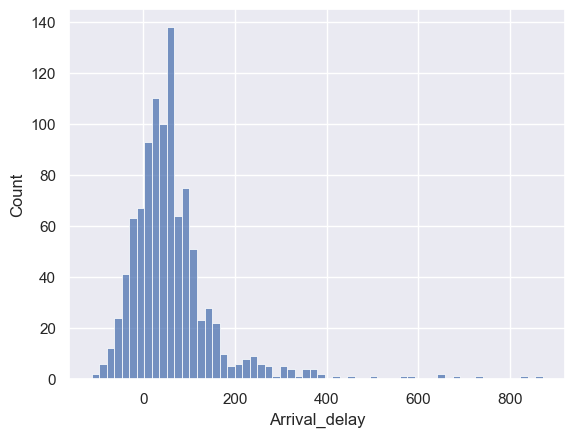

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of the plots using Seaborn.
sns.set()

# Create a histogram plot of the 'Arrival_delay' column from the DataFrame 'df'.
sns.histplot(x=df['Arrival_delay'])

In [66]:
# Calculate the correlation matrix for all columns in the DataFrame 'df'.
corr_matrix = df.corr()
# Sort the correlations between the 'Arrival_delay' column and other columns in descending order.
# This shows the correlation coefficients for each column with respect to 'Arrival_delay'.
correlations_with_arrival_delay = corr_matrix['Arrival_delay'].sort_values(ascending=False)

In [67]:
correlations_with_arrival_delay

Arrival_delay            1.000000
Upstream_stop_delay      0.910405
Dwell_time               0.143519
Recurrent_delay         -0.021810
Scheduled_travel_time   -0.180646
Name: Arrival_delay, dtype: float64

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


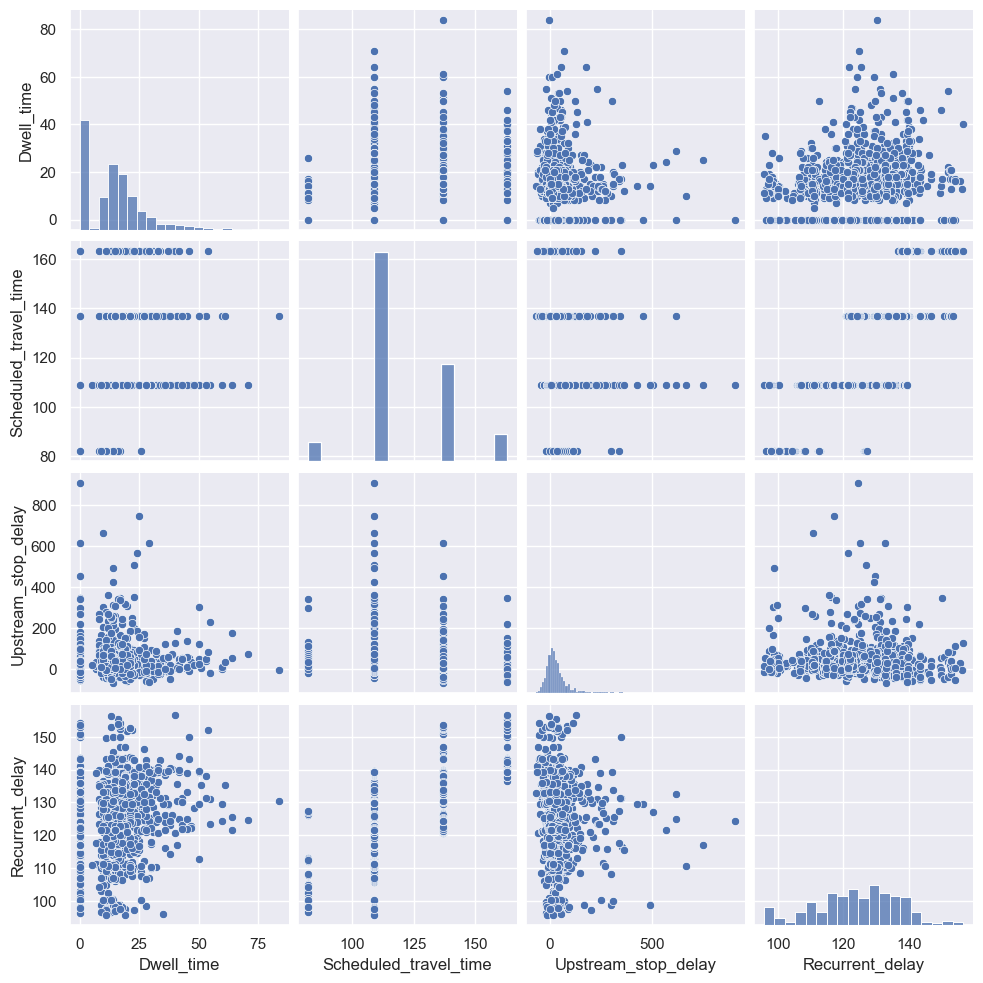

In [68]:
# Create a DataFrame 'x' containing all columns except 'Arrival_delay'.
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']
# Use Seaborn's pairplot to visualize pairwise relationships between the features in 'x'.
sns.pairplot(x)

##### Creating an NN model

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

Model: "sequential_189"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_567 (Dense)           (None, 32)                160       
                                                                 
 dense_568 (Dense)           (None, 64)                2112      
                                                                 
 dense_569 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Training and Prediction

Epoch 1/200
20/20 [==============================] - 1s 11ms/step - loss: 59.4200 - mae: 59.4200 - val_loss: 42.9958 - val_mae: 42.9958
Epoch 2/200
20/20 [==============================] - 0s 6ms/step - loss: 44.2451 - mae: 44.2451 - val_loss: 35.3708 - val_mae: 35.3708
Epoch 3/200
20/20 [==============================] - 0s 6ms/step - loss: 35.3305 - mae: 35.3305 - val_loss: 32.5552 - val_mae: 32.5552
Epoch 4/200
20/20 [==============================] - 0s 7ms/step - loss: 31.3640 - mae: 31.3640 - val_loss: 35.2936 - val_mae: 35.2936
Epoch 5/200
20/20 [==============================] - 0s 7ms/step - loss: 31.0189 - mae: 31.0189 - val_loss: 33.0370 - val_mae: 33.0370
Epoch 6/200
20/20 [==============================] - 0s 8ms/step - loss: 30.2086 - mae: 30.2086 - val_loss: 32.6113 - val_mae: 32.6113
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 30.0016 - mae: 30.0016 - val_loss: 31.9268 - val_mae: 31.9268
Epoch 8/200
20/20 [==============================] - 0

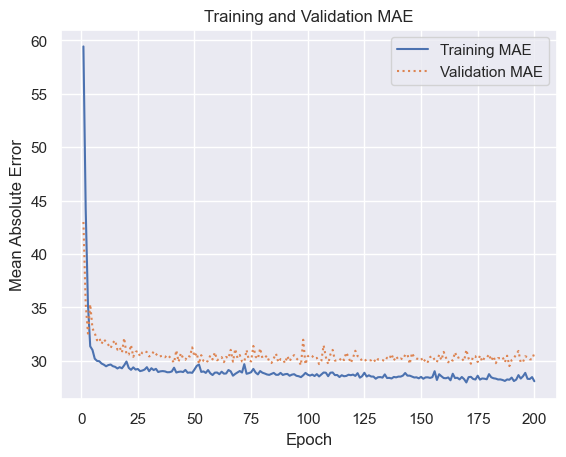

In [70]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test,verbose=False)

#### Evaluate the model

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the true and predicted values.
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2 = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 28.050384579151867
Mean Squared Error: 1423.650214023596
R-squared: 0.8793311262548921


#### Visualize the results

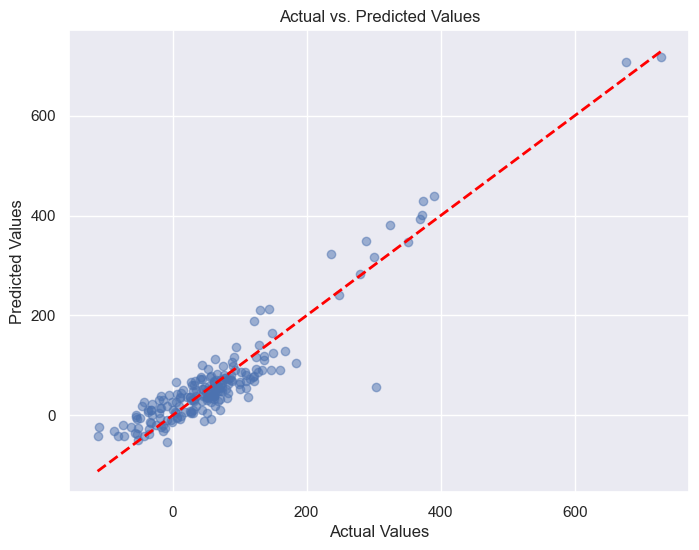

In [72]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

#### Task 2: Practical NN training techniques


Epoch 1: val_mae improved from inf to 37.85040, saving model to weights.best.h5

Epoch 2: val_mae improved from 37.85040 to 33.84538, saving model to weights.best.h5


c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 33.84538 to 32.53411, saving model to weights.best.h5

Epoch 4: val_mae improved from 32.53411 to 31.65870, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 31.65870

Epoch 6: val_mae did not improve from 31.65870

Epoch 7: val_mae did not improve from 31.65870

Epoch 8: val_mae did not improve from 31.65870

Epoch 9: val_mae improved from 31.65870 to 31.41285, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 31.41285

Epoch 11: val_mae improved from 31.41285 to 31.41107, saving model to weights.best.h5

Epoch 12: val_mae improved from 31.41107 to 31.25020, saving model to weights.best.h5

Epoch 13: val_mae improved from 31.25020 to 31.11454, saving model to weights.best.h5

Epoch 14: val_mae did not improve from 31.11454

Epoch 15: val_mae did not improve from 31.11454

Epoch 16: val_mae did not improve from 31.11454

Epoch 17: val_mae did not improve from 31.11454

Epoch 18: val_mae did not improve from 31.1

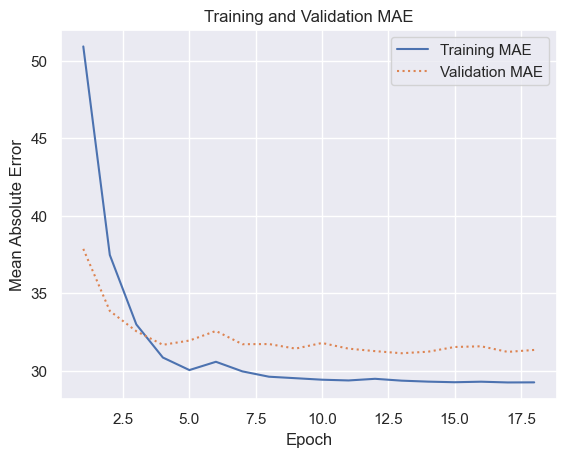

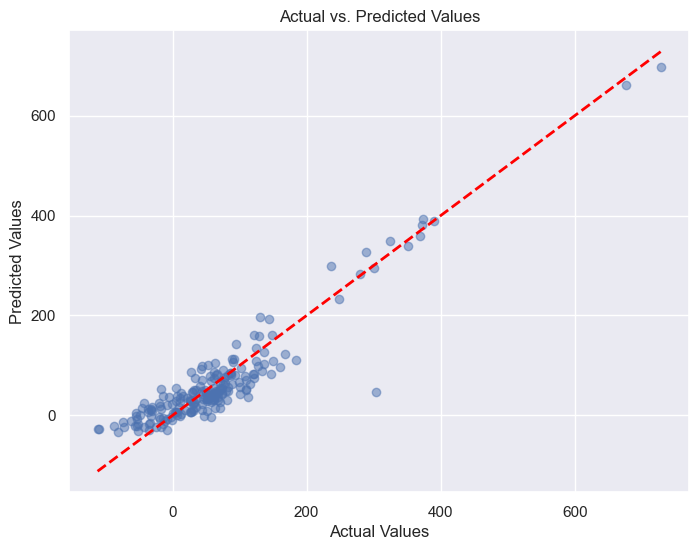

In [73]:
from json import load
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************

def construct_network_model():
  # Create a Sequential model, which is a linear stack of layers.
  model = Sequential()

  # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
  model.add(Dense(32, activation='relu', input_dim=4))

  # # Add a Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add another Dense layer with 64 units and ReLU activation.
  model.add(Dense(64, activation='relu'))

  # # Add another Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  model.add(Dense(1))
  return model

model=construct_network_model()
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can choose to add the dropout layer or not*****************


#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can choose to use the callback function or not**************
# Do not use the callback function
# hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function or not*************

#-------------------------------------------------model evaluation--------------------------------------------------------------------

# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()

#### Task 3: Compare the results with a linear regression model

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Mean Squared Error of linear model: {mse_linear}")
print(f"R-squared of linear model: {r2_linear}")


Epoch 1: val_mae improved from inf to 48.83433, saving model to weights.best.h5

Epoch 2: val_mae improved from 48.83433 to 40.34356, saving model to weights.best.h5


c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 40.34356 to 32.75844, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 32.75844

Epoch 5: val_mae did not improve from 32.75844

Epoch 6: val_mae did not improve from 32.75844

Epoch 7: val_mae did not improve from 32.75844

Epoch 8: val_mae did not improve from 32.75844
7/7 [==============================] - 0s 2ms/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 36.68372477054596
Mean Squared Error: 2397.06802671424
R-squared: 0.7968240399047757
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Error of linear model: 27.212896524198076
Mean Squared Error of linear model: 1369.2194384581423
R-squared of linear model: 0.883944689558474


#### Assignment task: Find the best neural network model for the bus delay prediction(assignment submission)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define a list of activation functions to iterate through
activation_functions = ['relu', 'softmax', 'selu', 'elu', 'tanh', 'sigmoid']

# Create an empty list to store results
results_list = []

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame.
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:2000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Iterate through activation functions
for activation_function in activation_functions:
    print(f"Activation Function: {activation_function}")

    # Create a Sequential model
    model = Sequential()

    # Add a Dense layer with 32 units and the current activation function
    model.add(Dense(32, activation=activation_function, input_dim=4))

    # model.add(Dropout(0.2))

    # Add another Dense layer with 64 units and the current activation function
    model.add(Dense(64, activation=activation_function))

    # model.add(Dropout(0.1))

    # Add a final Dense layer with 1 unit (typically used for regression tasks).
    model.add(Dense(1))

    # Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
    # and MAE metric to be used during training.
    model.compile(optimizer='adamax', loss='mae', metrics=['mae'])

    # Define callbacks
    early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)
    filepath = "weights.best.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

    # Train the model using the fit method.
    hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32,
                     callbacks=[early_stop, reduce_lr, checkpoint], verbose=0)

    # Use the trained model to predict on the test data.
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results to the list
    results_list.append({'Activation_Function': activation_function, 'MSE': mse, 'MAE': mae, 'R2': r2})

    # Print the evaluation metrics.
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

# Create a DataFrame from the results list
results_df_3 = pd.DataFrame(results_list)

Activation Function: relu

Epoch 1: val_mae improved from inf to 43.30357, saving model to weights.best.h5


c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 43.30357 to 32.50608, saving model to weights.best.h5

Epoch 3: val_mae improved from 32.50608 to 31.26657, saving model to weights.best.h5

Epoch 4: val_mae improved from 31.26657 to 30.98060, saving model to weights.best.h5

Epoch 5: val_mae improved from 30.98060 to 30.90828, saving model to weights.best.h5

Epoch 6: val_mae improved from 30.90828 to 30.33376, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 30.33376

Epoch 8: val_mae improved from 30.33376 to 30.16973, saving model to weights.best.h5

Epoch 9: val_mae improved from 30.16973 to 29.74608, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 29.74608

Epoch 11: val_mae improved from 29.74608 to 29.48139, saving model to weights.best.h5

Epoch 12: val_mae did not improve from 29.48139

Epoch 13: val_mae improved from 29.48139 to 29.44218, saving model to weights.best.h5

Epoch 14: val_mae improved from 29.44218 to 29.38966, saving model to weights

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 83.05532 to 83.00893, saving model to weights.best.h5

Epoch 3: val_mae improved from 83.00893 to 82.96184, saving model to weights.best.h5

Epoch 4: val_mae improved from 82.96184 to 82.91594, saving model to weights.best.h5

Epoch 5: val_mae improved from 82.91594 to 82.87175, saving model to weights.best.h5

Epoch 6: val_mae improved from 82.87175 to 82.82845, saving model to weights.best.h5

Epoch 7: val_mae improved from 82.82845 to 82.78373, saving model to weights.best.h5

Epoch 8: val_mae improved from 82.78373 to 82.73830, saving model to weights.best.h5

Epoch 9: val_mae improved from 82.73830 to 82.69457, saving model to weights.best.h5

Epoch 10: val_mae improved from 82.69457 to 82.65118, saving model to weights.best.h5

Epoch 11: val_mae improved from 82.65118 to 82.60780, saving model to weights.best.h5

Epoch 12: val_mae improved from 82.60780 to 82.56475, saving model to weights.best.h5

Epoch 13: val_mae improved from 82.56475 to 82.520

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 41.91323 to 32.57641, saving model to weights.best.h5

Epoch 3: val_mae improved from 32.57641 to 31.67249, saving model to weights.best.h5

Epoch 4: val_mae improved from 31.67249 to 31.10751, saving model to weights.best.h5

Epoch 5: val_mae improved from 31.10751 to 30.59537, saving model to weights.best.h5

Epoch 6: val_mae improved from 30.59537 to 30.43256, saving model to weights.best.h5

Epoch 7: val_mae improved from 30.43256 to 29.55095, saving model to weights.best.h5

Epoch 8: val_mae did not improve from 29.55095

Epoch 9: val_mae improved from 29.55095 to 29.38737, saving model to weights.best.h5

Epoch 10: val_mae improved from 29.38737 to 29.36917, saving model to weights.best.h5

Epoch 11: val_mae improved from 29.36917 to 28.81540, saving model to weights.best.h5

Epoch 12: val_mae did not improve from 28.81540

Epoch 13: val_mae did not improve from 28.81540

Epoch 14: val_mae improved from 28.81540 to 28.68870, saving model to weights

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 48.85434 to 37.85954, saving model to weights.best.h5

Epoch 3: val_mae improved from 37.85954 to 32.48492, saving model to weights.best.h5

Epoch 4: val_mae improved from 32.48492 to 31.15290, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 31.15290

Epoch 6: val_mae improved from 31.15290 to 30.97424, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 30.97424

Epoch 8: val_mae did not improve from 30.97424

Epoch 9: val_mae improved from 30.97424 to 30.41150, saving model to weights.best.h5

Epoch 10: val_mae improved from 30.41150 to 30.24427, saving model to weights.best.h5

Epoch 11: val_mae improved from 30.24427 to 30.10403, saving model to weights.best.h5

Epoch 12: val_mae did not improve from 30.10403

Epoch 13: val_mae improved from 30.10403 to 30.06001, saving model to weights.best.h5

Epoch 14: val_mae improved from 30.06001 to 29.41636, saving model to weights.best.h5

Epoch 15: val_mae did not im

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 78.77085 to 76.59452, saving model to weights.best.h5

Epoch 3: val_mae improved from 76.59452 to 75.22134, saving model to weights.best.h5

Epoch 4: val_mae improved from 75.22134 to 74.14040, saving model to weights.best.h5

Epoch 5: val_mae improved from 74.14040 to 73.16127, saving model to weights.best.h5

Epoch 6: val_mae improved from 73.16127 to 72.23002, saving model to weights.best.h5

Epoch 7: val_mae improved from 72.23002 to 71.19848, saving model to weights.best.h5

Epoch 8: val_mae improved from 71.19848 to 70.18229, saving model to weights.best.h5

Epoch 9: val_mae improved from 70.18229 to 69.11507, saving model to weights.best.h5

Epoch 10: val_mae improved from 69.11507 to 67.96548, saving model to weights.best.h5

Epoch 11: val_mae improved from 67.96548 to 66.90722, saving model to weights.best.h5

Epoch 12: val_mae improved from 66.90722 to 65.92970, saving model to weights.best.h5

Epoch 13: val_mae improved from 65.92970 to 65.033

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_mae improved from 81.45828 to 80.37991, saving model to weights.best.h5

Epoch 3: val_mae improved from 80.37991 to 79.28118, saving model to weights.best.h5

Epoch 4: val_mae improved from 79.28118 to 78.19099, saving model to weights.best.h5

Epoch 5: val_mae improved from 78.19099 to 77.16126, saving model to weights.best.h5

Epoch 6: val_mae improved from 77.16126 to 76.17738, saving model to weights.best.h5

Epoch 7: val_mae improved from 76.17738 to 75.35732, saving model to weights.best.h5

Epoch 8: val_mae improved from 75.35732 to 74.55650, saving model to weights.best.h5

Epoch 9: val_mae improved from 74.55650 to 73.73409, saving model to weights.best.h5

Epoch 10: val_mae improved from 73.73409 to 72.96223, saving model to weights.best.h5

Epoch 11: val_mae improved from 72.96223 to 72.25336, saving model to weights.best.h5

Epoch 12: val_mae improved from 72.25336 to 71.57131, saving model to weights.best.h5

Epoch 13: val_mae improved from 71.57131 to 70.893

In [76]:
results_df_3

,Activation_Function,MSE,MAE,R2
0,relu,1392.053759,29.821039,0.907481
1,softmax,18597.757826,82.023904,-0.236043
2,selu,1397.169728,29.811784,0.907141
3,elu,1404.077092,29.880604,0.906682
4,tanh,8238.983291,45.722405,0.452421
5,sigmoid,8756.712782,46.699190,0.418012



Epoch 1: val_mae improved from inf to 46.21730, saving model to weights.best.h5

Epoch 2: val_mae improved from 46.21730 to 41.31302, saving model to weights.best.h5


c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_mae improved from 41.31302 to 37.07228, saving model to weights.best.h5

Epoch 4: val_mae improved from 37.07228 to 33.21702, saving model to weights.best.h5

Epoch 5: val_mae improved from 33.21702 to 31.25973, saving model to weights.best.h5

Epoch 6: val_mae did not improve from 31.25973

Epoch 7: val_mae did not improve from 31.25973

Epoch 8: val_mae did not improve from 31.25973

Epoch 9: val_mae did not improve from 31.25973

Epoch 10: val_mae did not improve from 31.25973
7/7 [==============================] - 0s 1ms/step
Mean Absolute Error: 34.31095084667206
Mean Squared Error: 2046.284823678491
R-squared: 0.826556493580594


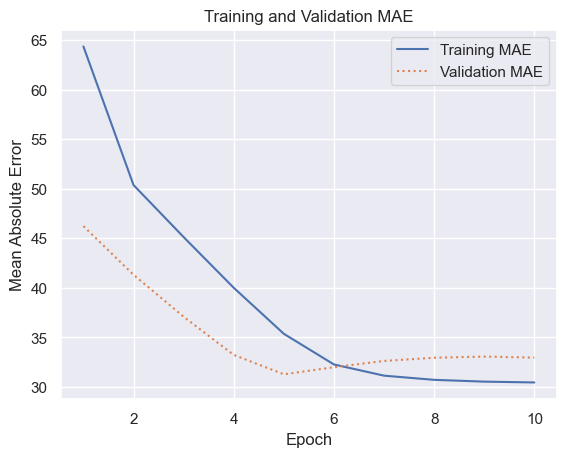

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='selu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='selu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adamax', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
